# **<u><p align="left">OLS Regression Analysis using a used car Dataset.</p></u>**

## **<u><p align="right">By Conrad Katlego Mogane</p></u>**


---

# **<u>1. Introduction</u>**



 **<u>OLS Regression Analysis using a used car Dataset</u>**

This project explores the relationship between a vehicle’s age and its corresponding mileage and market price using linear regression models. Based on data from 13075 cars.

# **<u>2. Background</u>**

**According to [Nedbank Learn](https://personal.nedbank.co.za/learn/blog/age-or-mileage-more-important-when-buying-a-used-car.html), the following criterion is used to determine eligibility for Sale on the market.**

- **High mileage typically results in lower car prices** due to **increased wear and tear** and the likelihood of frequent part replacements.
- Older vehicles tend to have reduced engine power.
- Unusually low mileage in an old car may indicate potential issues stemming from extended periods of inactivity.
-**Cars are designed for regular use**, so prolonged inactivity can lead to the need for costly repairs.
- Reasonable mileage for a used car is **15 000 to 20 000 km per year**.
- **5-year-old cars** with normal usage typically have **75 000 to 100 00 km**.
- A **3-year-old car** with **100 000 km** indicates above-average use then check the service and accidents history.
- Be cautious about costly repairs if a car is out of warranty.
- A **5-year-old car** with **50 000 km** is likely in better condition due to moderate use.
- Always check accident and service history, regardless of mileage.
- A **5-year-old car** with only **25 000 km** might have spent a lot of time at the mechanic, potentially leading to high repair costs.

## **<u>3. Methodology & Results</u>**

- Sales data of 13075 cars from south african e-cormmerce i.e [Autotrader](https://www.autotrader.co.za/), [cars.co.za](https://www.cars.co.za/), [thecarplace](https://thecarplace.co.za/) was collected and aggregated.
- Age of vehicle was calculated by subtracting the manufacturing year from the year the data was collected.
- OLS Regression Analysis was done on vehicles under 21 years old and 250 000 kilometers in mileage against age.
- Evaluate model performance through statistical metrics such as **R², p-values, and standard errors** visualizations and regression summaries.


## **<u>3.1. install and import libraries</u>**

In [ ]:
pip install -r requirements.txt

In [15]:
# Data analysis libraries
import numpy as np
import pandas as pd
# Statistics
from scipy.stats import linregress
import statsmodels.api as sm
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {'figure.dpi': 100,},font_scale = 0.85,style = "darkgrid")


## **<u>3.2. Data Wrangling</u>**

In [16]:
#Loading sets
df_one = pd.read_excel(r"D:\GitHub\buyable2023.xlsx")
df_two = pd.read_excel(r'D:\GitHub\fortuner.xlsx')
df_three = pd.read_excel(r'D:\GitHub\VW_POLO_DATASET.xlsx')
#combinin
df_pool = pd.concat([df_one,df_two,df_three], ignore_index= True,)
#Creating Age Variable
df_pool['Age'] = df_pool['Year_Data_Collected']-df_pool['Year']
#Selecting Target Variables
df_select = df_pool[['Model','Price','Mileage','Age']]
df_select.head(5)

,Model,Price,Mileage,Age
0,RENAULT CAPTUR 900T BLAZE 5DR (66KW),149950,96000,6
1,NISSAN MICRA 1.2 VISIA+ AUDIO 5DR (D86V),129950,22000,6
2,KIA PICANTO 1.2 LS,114999,70000,6
3,VOLKSWAGEN POLO VIVO 1.4 5Dr,124995,166134,9
4,FORD FIGO 1.4 AMBIENTE,82995,162123,10


### **Removing outlier based on According to [Nedbank Learn](https://personal.nedbank.co.za/learn/blog/age-or-mileage-more-important-when-buying-a-used-car.html)**
- Cars over **20 years.**
- Cars with mileage over **250 000 km**

In [17]:
cars = df_select[(df_select['Age']<21)&(df_select['Mileage']<250000)]
cars

,Model,Price,Mileage,Age
0,RENAULT CAPTUR 900T BLAZE 5DR (66KW),149950,96000,6
1,NISSAN MICRA 1.2 VISIA+ AUDIO 5DR (D86V),129950,22000,6
2,KIA PICANTO 1.2 LS,114999,70000,6
3,VOLKSWAGEN POLO VIVO 1.4 5Dr,124995,166134,9
4,FORD FIGO 1.4 AMBIENTE,82995,162123,10
...,...,...,...,...
13064,Volkswagen Polo 1.4,47900,59653,19
13065,Volkswagen Polo 1.6 Comfortline,89900,59300,19
13066,Volkswagen Polo Classic 1.6 Comfortline,89900,59163,19
13067,Volkswagen Polo Classic 1.6 Comfortline,89900,58933,19


### **<U>Summary Statistiscs</u>**

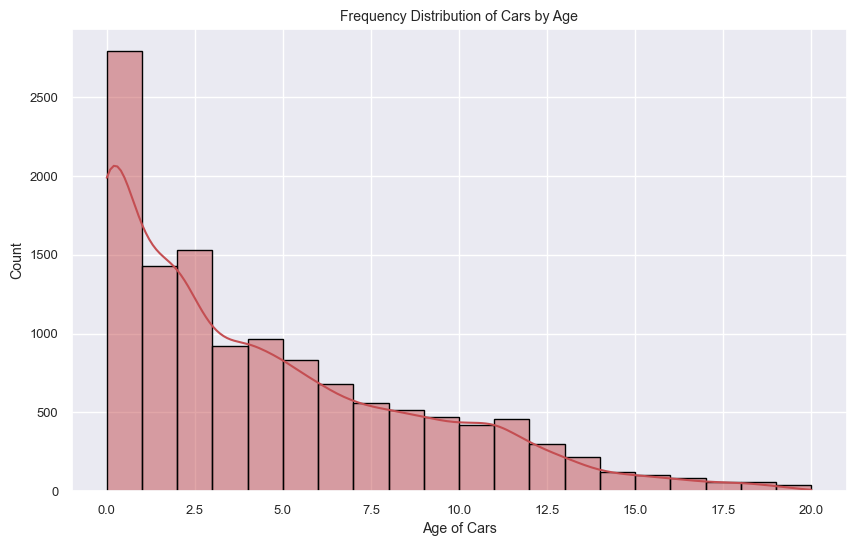

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(cars,x='Age',color = 'r' ,edgecolor='black',bins=20, kde=True)
plt.title('Frequency Distribution of Cars by Age')
plt.xlabel('Age of Cars')
plt.xscale('linear')

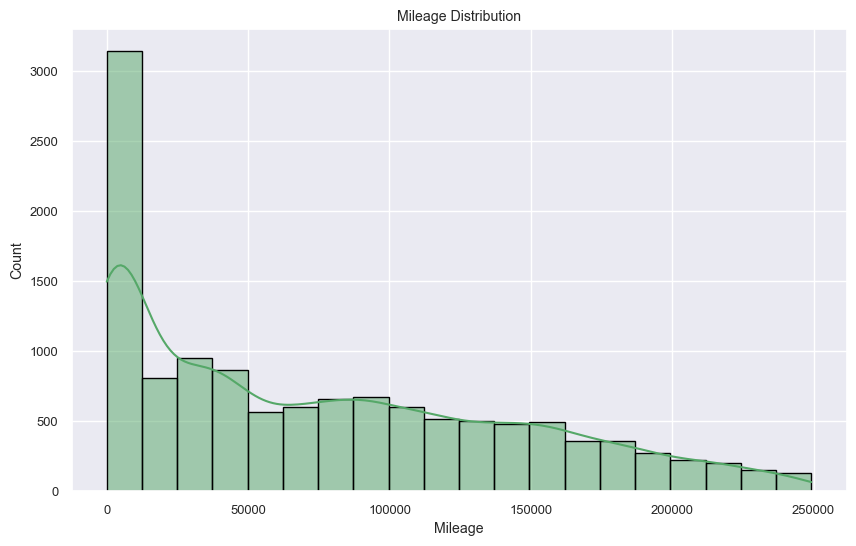

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(cars,x='Mileage',color='g',edgecolor='black',bins=20, kde=True)
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.xscale('linear')

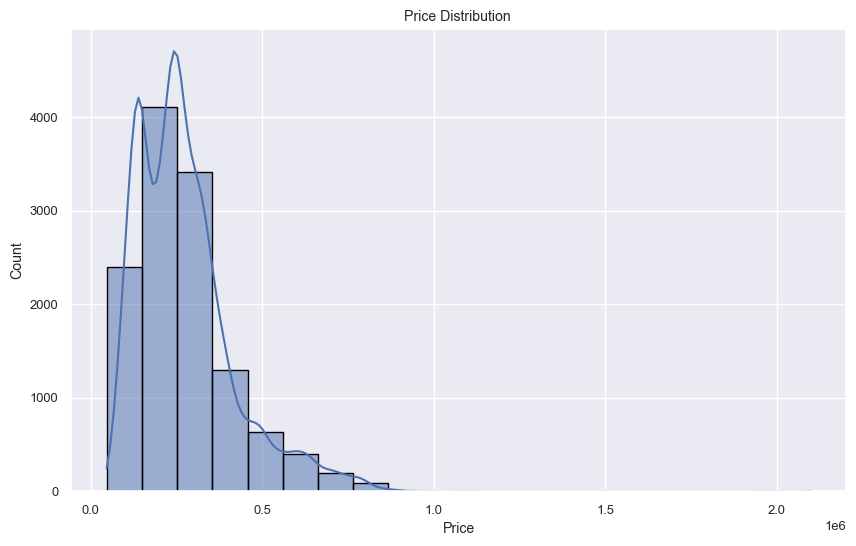

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(cars,x='Price',color ='b',edgecolor='black',bins=20, kde=True)
plt.title('Price Distribution ')
plt.xlabel('Price')
plt.xscale('linear')

In [21]:
cars.describe(include='all').fillna('--').round(2)

,Model,Price,Mileage,Age
count,12542,12550.0,12550.0,12550.0
unique,1144,--,--,--
top,Volkswagen Polo Vivo Hatch 1.4 Trendline,--,--,--
freq,1305,--,--,--
mean,--,275142.282789,75595.776733,4.346693
std,--,145694.80137,67259.963094,4.295156
min,--,46900.0,0.0,0.0
25%,--,164999.0,12394.75,1.0
50%,--,249900.0,61683.0,3.0
75%,--,334950.0,125302.75,7.0


## **<u>3.3. Regression Analysis**</u>

- Mileage vs Age
- Price vs Age

### **<u>3.3.1. Mileage vs Age</u>**

The **average mileage and price per year** was was used to perform the regression analysis.

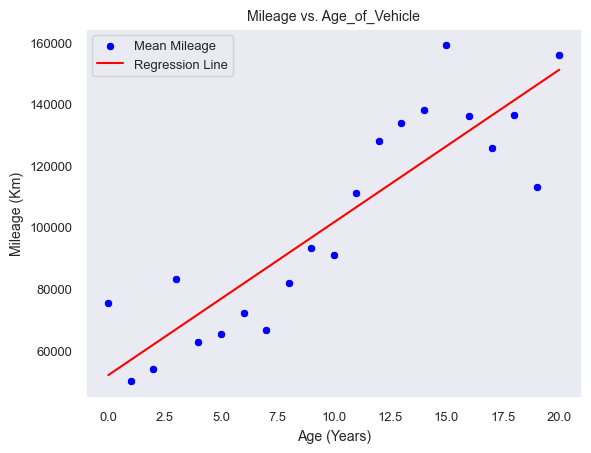

Mileage Regression equation: y = 4953.18x + 52037.73 

R² = 0.789 | P-value = 0.000 | Std Error = 587.967 | intercept = 52037.73 | Slope = 4953.18 

                            OLS Regression Results                            
Dep. Variable:           mean_mileage   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     70.97
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           7.71e-08
Time:                        10:58:40   Log-Likelihood:                -232.44
No. Observations:                  21   AIC:                             468.9
Df Residuals:                      19   BIC:                             471.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [

In [22]:
#aggregation
cars_km = cars.groupby('Age')['Mileage'].aggregate(['mean', 'std', 'count']).round(2).reset_index()
cars_km.rename(columns={'mean': 'mean_mileage', 'std': 'std_mileage', 'count': 'count_km'}, inplace=True)
# Regression Analysis
x = sm.add_constant(cars_km['Age'])
model_km = sm.OLS(cars_km['mean_mileage'],x).fit()
# Compute regression variables
result_km = linregress(cars_km['Age'],cars_km['mean_mileage'])
slope_km = result_km.slope
intercept_km = result_km.intercept
r_value_km = result_km.rvalue
p_value_km = result_km.pvalue
std_err_km = result_km.stderr

# Plotting the regression line
sns.scatterplot(x=cars_km['Age'], y=cars_km['mean_mileage'], color='blue', label='Mean Mileage')
sns.lineplot(x=cars_km['Age'], y=slope_km * cars_km['Age'] + intercept_km, color='red',
             label='Regression Line')
plt.xlabel("Age (Years)")
plt.ylabel("Mileage (Km)")
plt.title("Mileage vs. Age_of_Vehicle")
plt.legend()
plt.grid()
plt.show()
#results
print(f"Mileage Regression equation: y = {slope_km:.2f}x + {intercept_km:.2f}",'\n')
print(f"R² = {r_value_km**2:.3f}",'|', f"P-value = {p_value_km:.3f}",'|',
      f"Std Error = {std_err_km:.3f}",'|',f"intercept = {intercept_km:.2f}",'|',
      f"Slope = {slope_km:.2f}",'\n')
print('==============================================================================')
print(model_km.summary())

### **<u>3.3.2. Price vs Age</u>**

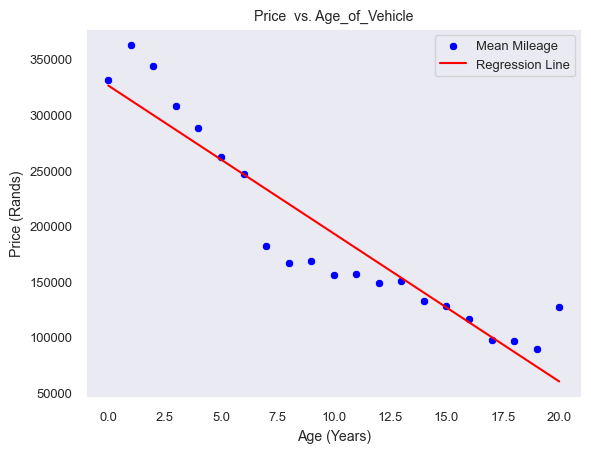

Price Regression equation: y = -13303.50x + 326354.14 

R² = 0.877 | P-value = 0.000 | Std Error = 1144.771 | intercept = 326354.14 | Slope = -13303.50 

                            OLS Regression Results                            
Dep. Variable:             mean_price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     135.1
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           4.45e-10
Time:                        10:58:41   Log-Likelihood:                -246.44
No. Observations:                  21   AIC:                             496.9
Df Residuals:                      19   BIC:                             499.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

In [23]:
#Data aggregation
cars_price = cars.groupby('Age')['Price'].aggregate(['mean', 'std', 'count']).round(2).reset_index()
cars_price.rename(columns={'mean': 'mean_price', 'std': 'std_price', 'count': 'count_price'}, inplace=True)
# Regression Analysis
# Add constant for intercept for analysis
x1 = sm.add_constant(cars_price['Age'])
model_price = sm.OLS(cars_price['mean_price'], x1).fit()
# Compute regression variables
result_price = linregress(cars_price['Age'],cars_price['mean_price'])
slope_price = result_price.slope
intercept_price = result_price.intercept
r_value_price = result_price.rvalue
p_value_price = result_price.pvalue
std_err_price = result_price.stderr

# Plotting the regression line
sns.scatterplot(x=cars_price['Age'], y=cars_price['mean_price'], color='blue', label='Mean Mileage')
sns.lineplot(x=cars_price['Age'], y=slope_price * cars_price['Age'] + intercept_price, color='red',
             label='Regression Line')
plt.xlabel("Age (Years)")
plt.ylabel("Price (Rands)")
plt.title("Price  vs. Age_of_Vehicle")
plt.legend()
plt.grid()
plt.show()
#Results
print(f"Price Regression equation: y = {slope_price:.2f}x + {intercept_price:.2f}",'\n')
print(f"R² = {r_value_price**2:.3f}",'|', f"P-value = {p_value_price:.3f}",'|',
      f"Std Error = {std_err_price:.3f}",'|',f"intercept = {intercept_price:.2f}",'|',
      f"Slope = {slope_price:.2f}",'\n')
print('==============================================================================')
print(model_price.summary())

Plotting both line plots on a same graph

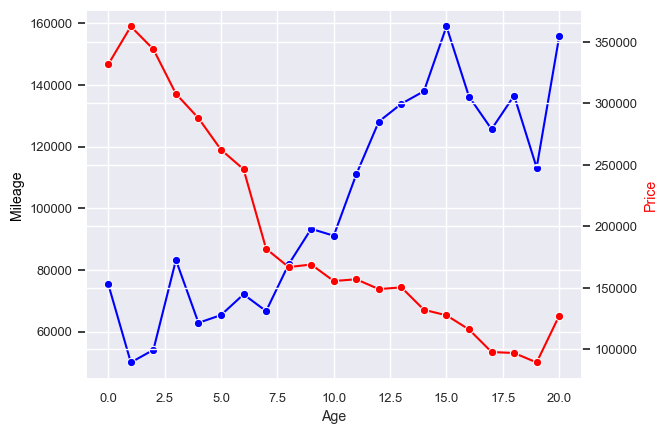

,Age,Price,Mileage
0,0,331682.55,75329.30
1,1,362409.28,49976.79
2,2,343857.28,54053.19
3,3,307696.92,83208.15
4,4,287863.49,62826.04
5,5,262237.75,65349.75
6,6,246378.88,72070.78
7,7,181774.34,66638.02
8,8,166916.42,81817.89
9,9,168981.86,93322.01


In [24]:
x = cars_km['Age']
y = cars_km['mean_mileage']
y1 = cars_price['mean_price']

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x = x, y = y, marker = 'o' ,ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = x, y = y1, marker = 'o', color = 'red', ax = ax2) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
ax1.set_xlabel('Age')
ax1.set_ylabel('Mileage', color='black')
ax2.set_ylabel('Price', color='red')

plt.show(); # shows the plot. 

pd.DataFrame(pd.DataFrame({'Age':cars_km['Age'],
        'Price':cars_price['mean_price'],
        'Mileage':cars_km['mean_mileage']}))

# **<u>4. Discusssion & Conclusion</U>**

In [25]:
#Regression Equations
print(f"Mileage Regression equation : y = {slope_km:.2f}x + {intercept_km:.2f}")
print(f"Price Regression equation   : y = {slope_price:.2f}x + {intercept_price:.2f}",'\n')
#Tabulate Results
pd.DataFrame({'Mileage Regression': [intercept_km,slope_km,r_value_km,std_err_km,p_value_km],
        'Price Regression': [intercept_price,slope_price,r_value_price,std_err_price,p_value_price],
        },index=['Intercept','Slope','R²','Standard Error','p-value']).round(2)


Mileage Regression equation : y = 4953.18x + 52037.73
Price Regression equation   : y = -13303.50x + 326354.14 



,Mileage Regression,Price Regression
Intercept,52037.73,326354.14
Slope,4953.18,-13303.50
R²,0.89,-0.94
Standard Error,587.97,1144.77
p-value,0.00,0.00


**<u>The hypothesis</u>**: As vehicles age, their resale **price declines and mileage accumulates**.

- Data was filtered to include only **vehicles under 20 years old, with mileage capped at 250,000 km**.
- The dataset contained **13,075 entries, with 12,999 valid for analysis after filtering**.
- **Ordinary Least Squares (OLS) regression** was used to model both price and mileage against vehicle age.
- Strong statistical significance was found in both models **(p < 0.001)**, validating that age is a powerful predictor.

**<u>Findings:</u>**


- A negative slope in the price model confirms depreciation  
    - **Mileage Model**: Mileage increases by approximately 5,000 km per year (slope = 4953.18), with an intercept of 52 037.73 km.


- A positive slope in the mileage model supports consistent usage over time.  
    - **Price Model**: Price decreases by about R13,000 per year (slope = -13303.5), with an intercept of R32,6354.14.


 **<u>Model Performance</u>**:


- Mileage model: 
    - **R² = 0.89**, indicating that **89%** of the variance in mileage can be explained by age.



- Price model: 
    - **R² = 0.94**, indicating that **94%** of the variance in price can be explained by age.


- Both models show strong predictive power, with low standard errors (mileage: 0.000, price: 0.000).
- The p-values for both models are less than 0.001, confirming statistical significance.

# **<u>5. Recommendations</u>**

- However, the **Durbin-Watson statistic (0.468 for price)** indicates **possible autocorrelation** — particularly in the residuals of the price model — which needs further testing.
- **These results could inform vehicle replacement schedules, public transport planning, or insurance valuation algorithms.**

# **<u>6. References & Acknowledgemnts</u>**

- [Nedbank Learn](https://personal.nedbank.co.za/learn/blog/age-or-mileage-more-important-when-buying-a-used-car.html) -**Age or Mileage more important when buying a used car**
- [ Ordinary Least Squares (OLS) regression ](https://diogoribeiro7.github.io/statistics/ordinary_least_square_regression/) - **Linear Regression**
- [Statsmodels](https://www.statsmodels.org/stable/index.html) - **Statistical Models in Python**
- [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) - **Statistical Functions in Python**
- [Pandas](https://pandas.pydata.org/docs/) - **Data Analysis Library in Python**
- [Matplotlib](https://matplotlib.org/stable/index.html) - **Plotting Library in Python**
- [Seaborn](https://seaborn.pydata.org/) - **Statistical Data Visualization Library in Python** 
- [Numpy](https://numpy.org/doc/stable/) - **Numerical Computing Library in Python**


---

**<p align="right">Author: Conrad Katlego Mogane  28/07/2025</p>**

---